In [179]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the dataset
dataset = pd.read_csv('dataset_adapted.csv')

# Delete last column
dataset = dataset.drop(dataset.columns[[-1]], axis=1)

# Use only columns that are relevant
columns_to_keep = ['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT', 'PROTOCOL', 'IN_BYTES', 'OUT_BYTES', 'TCP_FLAGS','Label']

dataset = dataset[columns_to_keep]
dataset = dataset.iloc[:, :].values

In [180]:
# Print dataset
display(dataset)

array([['172.31.64.123', 49875, '199.16.156.21', ..., 2158, 5796, 0],
       ['172.31.65.11', 56399, '209.85.202.155', ..., 897, 3249, 0],
       ['193.111.198.65', 28686, '172.31.69.6', ..., 1979, 875, 0],
       ...,
       ['172.31.67.63', 49906, '52.84.7.207', ..., 1550, 10356, 0],
       ['172.31.64.58', 52592, '209.85.202.154', ..., 1855, 6274, 0],
       ['172.31.64.46', 57549, '172.31.0.2', ..., 136, 228, 0]],
      dtype=object)

In [181]:
# Apply Label Encoding to the first column and the third column -> IPs
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
dataset[:, 0] = labelencoder_X.fit_transform(dataset[:, 0])

# Apply Label Encoding to the third column
labelencoder_X = LabelEncoder()
dataset[:, 2] = labelencoder_X.fit_transform(dataset[:, 2])


display(dataset)


array([[297, 49875, 691, ..., 2158, 5796, 0],
       [383, 56399, 727, ..., 897, 3249, 0],
       [947, 28686, 641, ..., 1979, 875, 0],
       ...,
       [642, 49906, 1027, ..., 1550, 10356, 0],
       [337, 52592, 726, ..., 1855, 6274, 0],
       [330, 57549, 193, ..., 136, 228, 0]], dtype=object)

In [182]:
# Scale the data X
from sklearn.preprocessing import QuantileTransformer

sc_X = QuantileTransformer(random_state=0)

# PCA to reduce the number of features
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

In [183]:
# Filtrar el conjunto de datos para incluir solo las filas donde 'Label' es 0 o 1
benign_data = dataset[np.where(dataset[:, -1] == 0)]
anomaly_data = dataset[np.where(dataset[:, -1] == 1)]


# Delete last column
benign_data = np.delete(benign_data, -1, axis=1)
anomaly_data = np.delete(anomaly_data, -1, axis=1)


print("Datos benignos")
print(benign_data)
print("Datos anómalos")
print(anomaly_data)


Datos benignos
[[297 49875 691 ... 6 2158 5796]
 [383 56399 727 ... 6 897 3249]
 [947 28686 641 ... 6 1979 875]
 ...
 [642 49906 1027 ... 6 1550 10356]
 [337 52592 726 ... 6 1855 6274]
 [330 57549 193 ... 17 136 228]]
Datos anómalos
[[771 59094 634 ... 6 840 560]
 [711 58780 660 ... 6 538 341]
 [758 45822 634 ... 6 3326 160]
 ...
 [188 59488 634 ... 6 420 280]
 [760 65534 636 ... 6 538 1147]
 [188 56614 634 ... 6 420 280]]


In [184]:
benign_data = sc_X.fit_transform(benign_data)
benign_data = pca.fit_transform(benign_data)

anomaly_data = sc_X.transform(anomaly_data)
anomaly_data = pca.transform(anomaly_data)

In [186]:
print(benign_data.shape)

(7500, 5)


In [187]:
# Aggregate the label 1 to anomaly_data
anomaly_data = np.append(anomaly_data, np.ones((anomaly_data.shape[0], 1)), axis=1)

# Aggregate the label 0 to benign_data
benign_data = np.append(benign_data, np.zeros((benign_data.shape[0], 1)), axis=1)

# Concatenate the two datasets
data = np.concatenate((benign_data, anomaly_data), axis=0)

data = pd.DataFrame(data)

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

display(data)

,0,1,2,3,4,5
0,0.617170,0.121834,-0.273790,-0.117997,0.066081,0.0
1,-0.202467,0.793558,-0.423386,0.291362,-0.292638,0.0
2,-0.527184,0.198475,0.541072,0.359835,-0.085897,1.0
3,0.546703,-0.212228,-0.521206,-0.053289,0.058278,0.0
4,-0.609254,0.073594,-0.042914,-0.156513,-0.140902,0.0
...,...,...,...,...,...,...
10001,0.784046,0.039273,-0.329989,0.139875,-0.047366,0.0
10002,0.561874,0.034157,-0.264120,-0.103438,0.062178,0.0
10003,-0.468588,0.105028,0.115839,0.101222,0.182364,1.0
10004,-0.834126,0.187334,-0.203349,-0.169415,0.110178,0.0


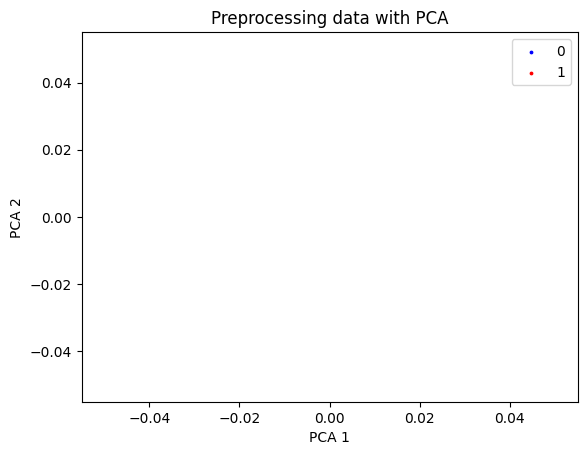

In [188]:
# Plot the data in 2D
plt.scatter(data[data[2] == 0][0], data[data[2] == 0][1], color = 'blue', label = '0', s=3.0)
plt.scatter(data[data[2] == 1][0], data[data[2] == 1][1], color = 'red', label = '1', s=3.0)
plt.title('Preprocessing data with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [189]:
# Plot the data in 3D

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data[data[3] == 0][0], data[data[3] == 0][1], data[data[3] == 0][2], color = 'blue', label = '0', s=3.0)
# ax.scatter(data[data[3] == 1][0], data[data[3] == 1][1], data[data[3] == 1][2], color = 'red', label = '1', s=3.0)

# # Cambia el punto de vista
# # 35 , 50
# ax.view_init(elev=35, azim=50)

# plt.title('PCA')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.legend()
# plt.show()


In [191]:
# Plot the data in 3D

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data[data[3] == 0][0], data[data[3] == 0][1], data[data[3] == 0][2], color = 'blue', label = '0', s=3.0)
# ax.scatter(data[data[3] == 1][0], data[data[3] == 1][1], data[data[3] == 1][2], color = 'red', label = '1', s=3.0)

# # Cambia el punto de vista
# ax.view_init(elev=30, azim=-30)

# plt.title('Preprocessing data with PCA')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.legend()
# plt.show()


In [192]:
print(data)

              0         1         2         3         4    5
0      0.617170  0.121834 -0.273790 -0.117997  0.066081  0.0
1     -0.202467  0.793558 -0.423386  0.291362 -0.292638  0.0
2     -0.527184  0.198475  0.541072  0.359835 -0.085897  1.0
3      0.546703 -0.212228 -0.521206 -0.053289  0.058278  0.0
4     -0.609254  0.073594 -0.042914 -0.156513 -0.140902  0.0
...         ...       ...       ...       ...       ...  ...
10001  0.784046  0.039273 -0.329989  0.139875 -0.047366  0.0
10002  0.561874  0.034157 -0.264120 -0.103438  0.062178  0.0
10003 -0.468588  0.105028  0.115839  0.101222  0.182364  1.0
10004 -0.834126  0.187334 -0.203349 -0.169415  0.110178  0.0
10005 -0.361667 -0.297341 -0.183386  0.454642 -0.098026  0.0

[10006 rows x 6 columns]


In [193]:
data.shape

(10006, 6)

In [194]:
# Save to a file the dataset

# ADD COLUMNS NAMES
text_label = "PCA"
counter_label = 1
data_columns_labels = []

for i in range(data.shape[1]-1):
    data_columns_labels.append(text_label + str(counter_label))
    counter_label += 1
data_columns_labels.append('Label')
print(data_columns_labels)
data.columns = data_columns_labels
data.to_csv('dataset_adapted_pca.csv', index=False, header=True)

['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'Label']
